## Observations and Insights 

In [1]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata, study_results, on ="Mouse ID")
# Display the data table for preview
mouse_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = mouse_results_df["Mouse ID"].count()
mouse_count

1893

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id_df = mouse_results_df[mouse_results_df.duplicated(subset=["Mouse ID","Timepoint"], keep = False)]
duplicate_id = duplicate_id_df["Mouse ID"]
duplicate_index = duplicate_id_df["Mouse ID"].index
duplicate_id.index

Int64Index([], dtype='int64')

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#duplicate_indexes = mouse_results_df[mouse_results_df["Mouse ID"] == duplicate_id].index
mouse_results_df = mouse_results_df.drop(mouse_results_df.index[duplicate_index])
mouse_results_df
#mouse_results_df.to_csv("data/combined_data.csv")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = mouse_results_df["Mouse ID"].count()
clean_mouse_count

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_mouse_data = mouse_results_df.groupby("Drug Regimen")
mean_data = grouped_mouse_data["Tumor Volume (mm3)"].mean()
median_data = grouped_mouse_data["Tumor Volume (mm3)"].median()
var_std_data = mouse_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.var,np.std]) 
sample_mouse_data = mouse_results_df.sample(100)
sem_data = sample_mouse_data.groupby("Drug Regimen").sem()


summary_df = pd.merge(mean_data,median_data, on ="Drug Regimen")
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)_x" : " Mean", "Tumor Volume (mm3)_y":"Median"})
summary_df = pd.merge(summary_df,var_std_data, on = "Drug Regimen")
summary_df = summary_df.rename(columns={"var":"Variance","std":"Standard Deviation"})
sem_data_tumor_volume = sem_data[["Tumor Volume (mm3)"]]
summary_df = pd.merge(summary_df,sem_data_tumor_volume, on = "Drug Regimen")
summary_df = summary_df.rename(columns = {"Tumor Volume (mm3)":"SEM"})
summary_df
# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,1.206000
Ceftamin,52.591172,51.776157,39.290177,6.268188,2.736192
Infubinol,52.884795,51.820584,43.128684,6.567243,1.725446
Ketapril,55.235638,53.698743,68.553577,8.279709,2.603053
Naftisol,54.331565,52.509285,66.173479,8.134708,3.425609
Placebo,54.033581,52.288934,61.168083,7.821003,2.941227
Propriva,52.393463,50.909965,43.138803,6.568014,1.464976
Ramicane,40.216745,40.673236,23.486704,4.846308,0.907715
Stelasyn,54.233149,52.431737,59.450562,7.710419,1.466583


## Bar and Pie Charts

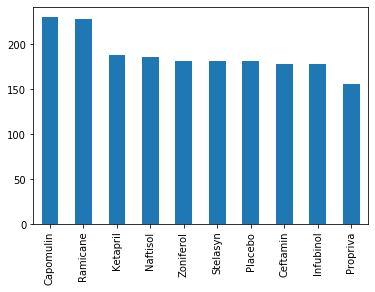

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_results_df
regimen_specimen_count = mouse_results_df["Drug Regimen"].value_counts()
regimen_specimen_count
x_axis = regimen_specimen_count.index
y_axis = regimen_specimen_count.values
my_bar_chart = regimen_specimen_count.plot.bar(x=regimen_specimen_count.index,y=regimen_specimen_count.values,rot ="vertical")
my_bar_chart

No handles with labels found to put in legend.


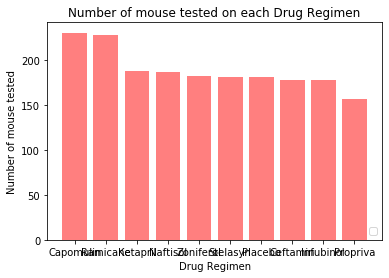

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.bar(x_axis, y_axis, color='red', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mouse tested")
plt.title("Number of mouse tested on each Drug Regimen")
plt.legend(loc="lower right")

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
subset_regimen_data = mouse_results_df.loc[(mouse_results_df["Drug Regimen"] == "Capomulin")|(mouse_results_df["Drug Regimen"] == "Ceftamin")|(mouse_results_df["Drug Regimen"] == "Infubinol")|(mouse_results_df["Drug Regimen"] == "Ramicane"),:]
# Start by getting the last (greatest) timepoint for each mouse
#final_tumor_data = subset_regimen_data[subset_regimen_data.duplicated(subset=["Mouse ID","Drug Regimen"], keep = False)]
#duplicate_tumor_id = final_tumor_data["Mouse ID"]
#final_tumor_data
#duplicate_tumor_index = final_tumor_data["Mouse ID"].index
#duplicate_tumor_index
#mouse_results_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#duplicate_tumor_df = subset_regimen_data.drop(subset_regimen_data.index[duplicate_tumor_index])
#duplicate_tumor_df
subset_regimen_data
grouped_Regimen_data = subset_regimen_data.groupby(["Mouse ID","Drug Regimen"])

max_timepoint = grouped_Regimen_data["Timepoint"].max()
#max_timepoint
my_new_df = pd.DataFrame(max_timepoint)
my_new_df
for index, row in my_new_df.iterrows():
    tumor = subset_regimen_data.loc[(subset_regimen_data["Mouse ID"] == row[0])&(subset_regimen_data["Drug Regimen"] == row[1])&(subset_regimen_data["Timepoint"]==row[3]),"Tumor Volume (mm3)"]
    my_new_df[index, "Tumor Volume (mm3)"] = tumor[0]
my_new_df
#max_index
#max_timepoint.to_csv("data/temp.csv")

IndexError: index out of bounds

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_results_df
subset_df = mouse_results_df.loc[mouse_results_df["Drug Regimen"] == "Capomulin",:]
subset_df
x_data = subset_df["Tumor Volume (mm3)"]
tumor_volume_data = x_data.values
y_data = subset_df["Timepoint"]
timepoint_data = y_data.values
timepoint_data

plt.plot(tumor_volume_data,timepoint_data)



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
groupby_df = subset_df.groupby(["Weight (g)"])
correlation_df = groupby_df["Tumor Volume (mm3)"].mean()
correlation_df
weight = correlation_df.index
weight
avg_tumor_volume = correlation_df.values
plt.scatter(weight,avg_tumor_volume, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.xlabel('Mouse weight in grams')
plt.ylabel('Average Tumor Volume')
plt.title("Scatter plot of Average Tumor Volume and Mouse Weight")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



In [ ]:

correlation_coefficient = st.pearsonr(weight,avg_tumor_volume)
correlation_coefficient

In [ ]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_volume, weight)
regress_values = avg_tumor_volume * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_tumor_volume,weight)
plt.plot(avg_tumor_volume,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Weight')
plt.show()